In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

In [8]:
class ForwardProcess:
  def __init__(self, image, timesteps):
        self.timesteps = timesteps
        self.image = image        
        # self.epi = torch.normal(mean=0, std=1, size=image.shape)
        self.epi = torch.randn_like(image)
        self.betas = torch.linspace(0.0001, 0.02, timesteps) 
        self.timesteps = timesteps

  def single_step(self, x_prev, t):
    beta_t = self.betas[t]
    part_x_prev =  torch.sqrt(1-beta_t) * x_prev                 # how much of the original image to keep after t steps
    noise_t =  torch.sqrt(beta_t) * self.epi                     # how much noise to add -> randomly distributed
    xt =  part_x_prev + noise_t
    return xt, noise_t

  def all_steps(self):
    x = [self.image]
    noise = []
    for t in range(self.timesteps):
      xt, noise_t = self.single_step(x_prev=x[t], t=t)
      x.append(xt)
      noise.append(noise_t)
    return x

  def direct_sampling(self, t):
    alphas = 1 - self.betas
    alpha_cum_prod = torch.cumprod(alphas, dim=0)

    # at t
    sqrt_alpha_cum_product_t = torch.sqrt(alpha_cum_prod[t]).view(-1, 1, 1)
    remaining_image = sqrt_alpha_cum_product_t * self.image

    one_minus_alpha_cum = torch.sqrt(1-alpha_cum_prod[t]).view(-1, 1, 1)
    noise = one_minus_alpha_cum * self.epi

    x = remaining_image + noise

    return x
  


In [9]:
# get original image
img_path = "cat.jpg"
im = Image.open(img_path)

# convert to numpy array and normalize to [0, 1]
im_arr = np.array(im) / 225.0
# print(repr(im_arr))
print(im_arr.shape)
image = torch.from_numpy(im_arr)

(401, 600, 3)


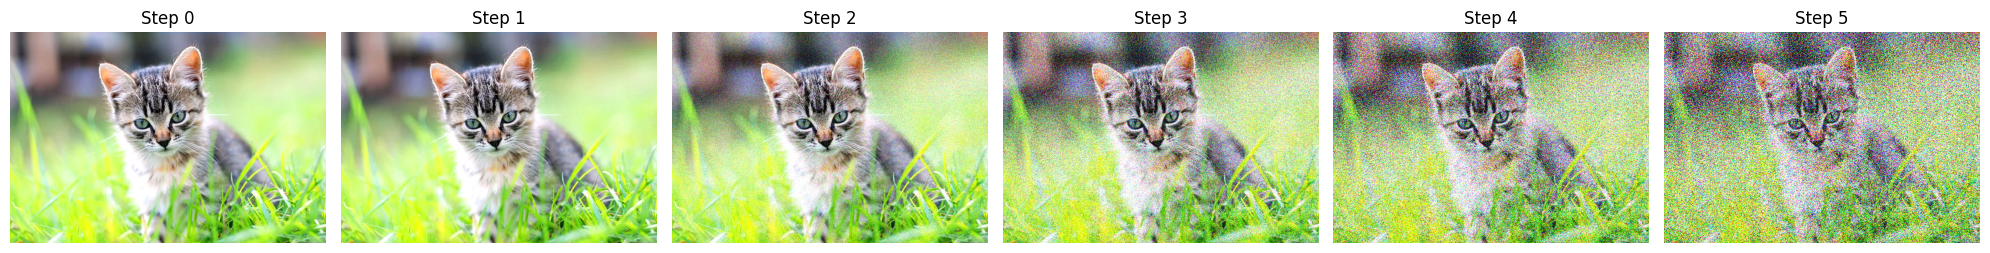

In [11]:
image = torch.from_numpy(im_arr)
fp = ForwardProcess(timesteps=5, image=image)
x = fp.all_steps()

# Create a single figure for all subplots
plt.figure(figsize=(20, 4)) 

# plot noisified images
for i in range(len(x)):
    display_image = np.clip(x[i], 0, 1)
    plt.subplot(1, len(x), i+1)
    plt.imshow(display_image)
    plt.axis('off') 
    plt.title(f'Step {i}')

plt.tight_layout() 
plt.show() 

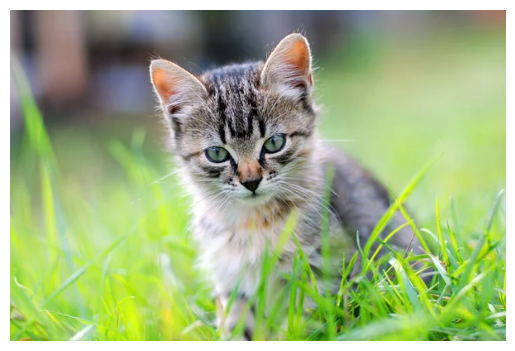

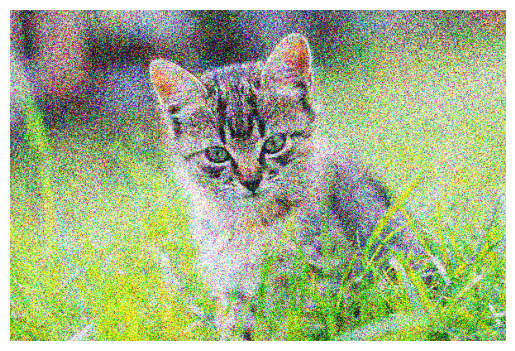

In [12]:
# direct processing
fp = ForwardProcess(timesteps=1000, image=image)
xt = fp.direct_sampling(t=100)
display_image = np.clip(xt, 0, 1)


# show original image
plt.imshow(im)
plt.axis("off")
plt.show()

# show final
plt.imshow(display_image)
plt.axis('off')
plt.show()